In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_rows', 500)

In [590]:
data = pd.read_csv('Data_Inkbit_updated.csv', encoding= 'unicode_escape')

In [591]:
data['A'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 120 entries, 0 to 119
Series name: A
Non-Null Count  Dtype  
--------------  -----  
120 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


In [592]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A                  120 non-null    float64
 1   B                  120 non-null    float64
 2   C                  120 non-null    float64
 3   D                  120 non-null    float64
 4   E                  120 non-null    float64
 5   F                  120 non-null    float64
 6   HDT_0.455©         116 non-null    float64
 7   UTS(Mpa)           118 non-null    float64
 8   Modulus(Gpa)       118 non-null    float64
 9   EAB%               118 non-null    float64
 10  Viscosity_75C(cp)  105 non-null    float64
 11  R value            120 non-null    float64
dtypes: float64(12)
memory usage: 11.4 KB


In [593]:
data.isnull().sum()

A                     0
B                     0
C                     0
D                     0
E                     0
F                     0
HDT_0.455©            4
UTS(Mpa)              2
Modulus(Gpa)          2
EAB%                  2
Viscosity_75C(cp)    15
R value               0
dtype: int64

### Will Exclude samples as needed for specific analysis ###

In [594]:
data.describe()

,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value
count,120.00,120.00,120.00,120.00,120.00,120.00,116.00,118.00,118.00,118.00,105.00,120.00
mean,41.32,8.30,14.30,19.78,10.63,5.67,105.17,53.83,2.12,8.93,13.66,3.22
std,6.03,5.72,5.91,6.17,4.36,5.76,22.89,6.39,0.24,5.30,5.41,0.71
min,29.00,0.00,5.00,5.00,2.00,0.00,47.30,39.63,1.54,2.42,6.29,1.75
25%,36.55,4.95,10.00,17.08,7.40,0.00,88.80,50.06,1.95,5.99,8.35,2.80
50%,39.81,7.35,13.73,20.22,11.95,8.00,108.25,53.73,2.13,7.95,14.30,3.01
75%,47.26,12.00,18.00,23.56,14.06,11.96,120.35,58.25,2.28,10.53,17.01,3.41
max,52.00,20.00,29.00,31.58,17.00,13.00,163.40,68.67,2.91,46.06,28.10,5.00


In [595]:
data.corr()

,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value
A,1.00,-0.54,-0.07,-0.35,-0.18,0.07,0.41,0.29,0.16,-0.14,0.14,0.31
B,-0.54,1.00,0.02,-0.01,0.06,-0.49,-0.07,0.21,0.18,-0.15,-0.23,-0.04
C,-0.07,0.02,1.00,-0.20,-0.65,-0.27,0.25,0.46,0.53,-0.15,-0.48,-0.30
D,-0.35,-0.01,-0.20,1.00,-0.11,-0.41,0.26,-0.03,-0.20,-0.38,-0.51,0.48
E,-0.18,0.06,-0.65,-0.11,1.00,0.16,-0.85,-0.59,-0.36,0.41,0.30,-0.48
F,0.07,-0.49,-0.27,-0.41,0.16,1.00,-0.24,-0.50,-0.42,0.56,0.91,-0.13
HDT_0.455©,0.41,-0.07,0.25,0.26,-0.85,-0.24,1.00,0.57,0.20,-0.55,-0.24,0.77
UTS(Mpa),0.29,0.21,0.46,-0.03,-0.59,-0.50,0.57,1.00,0.47,-0.44,-0.45,0.30
Modulus(Gpa),0.16,0.18,0.53,-0.20,-0.36,-0.42,0.20,0.47,1.00,-0.25,-0.41,-0.05
EAB%,-0.14,-0.15,-0.15,-0.38,0.41,0.56,-0.55,-0.44,-0.25,1.00,0.52,-0.40


### Exploring the PDFs

<Axes: xlabel='R value', ylabel='Count'>

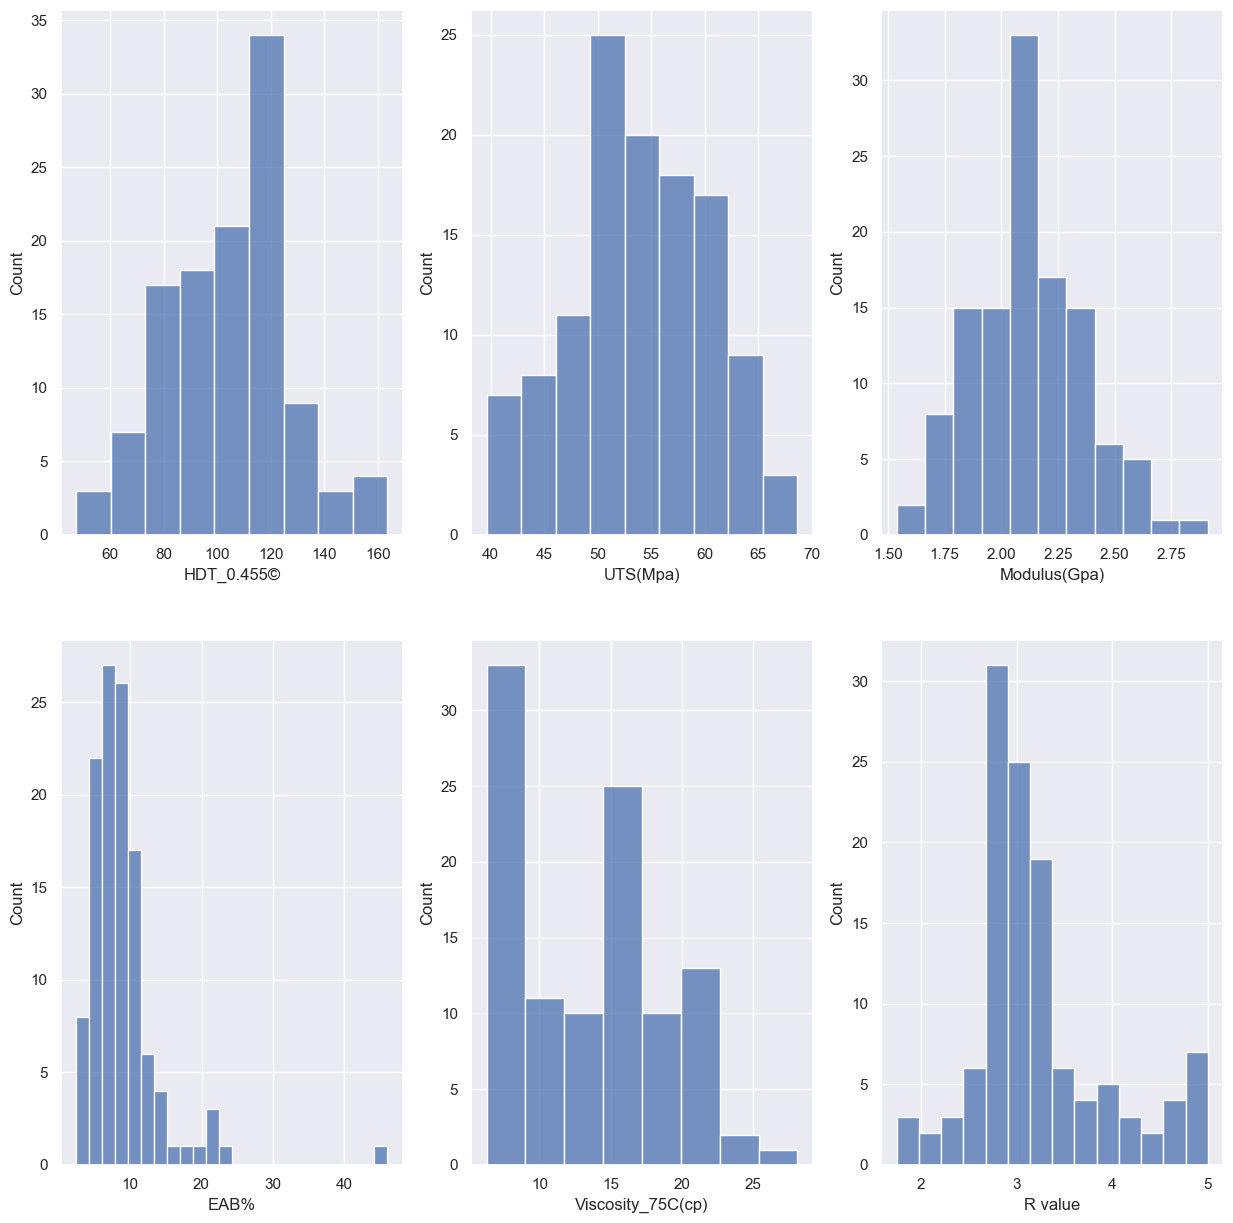

In [596]:
fig,axes = plt.subplots(2,3,figsize=(15,15))
sns.histplot(data['HDT_0.455©'],ax=axes[0][0])
sns.histplot(data['UTS(Mpa)'],ax=axes[0][1])
sns.histplot(data['Modulus(Gpa)'],ax=axes[0][2])
sns.histplot(data['EAB%'],ax=axes[1][0])
sns.histplot(data['Viscosity_75C(cp)'],ax=axes[1][1])
sns.histplot(data['R value'],ax=axes[1][2])


In [597]:
data2=data[data['EAB%']<30]

<Axes: xlabel='R value', ylabel='Count'>

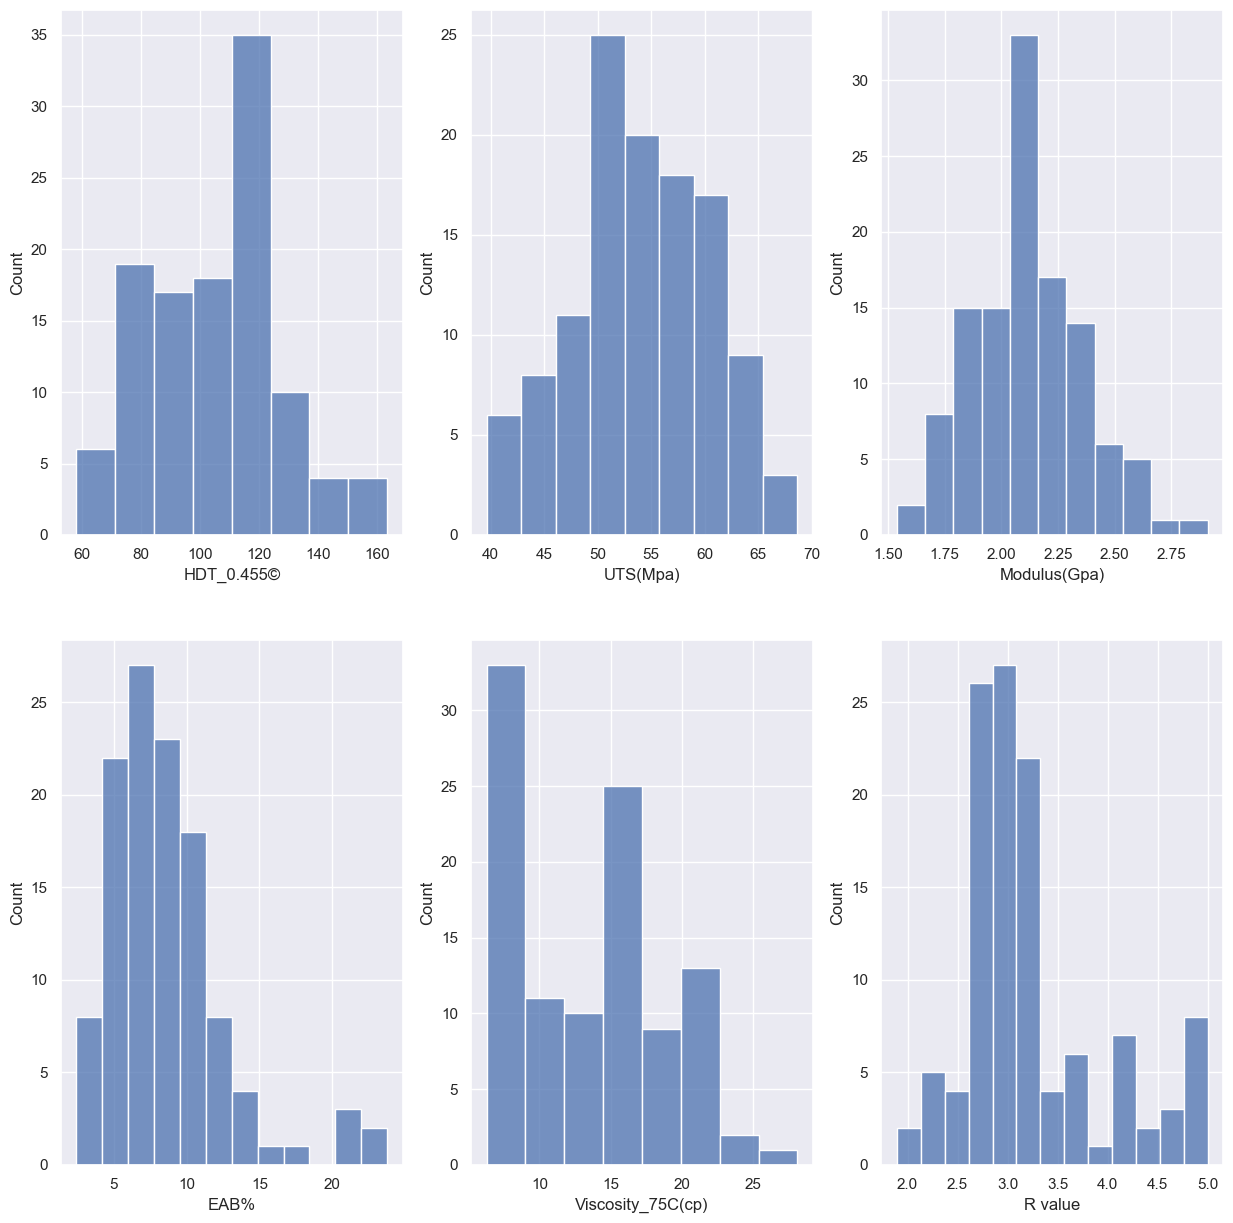

In [598]:
fig,axes = plt.subplots(2,3,figsize=(15,15))
sns.histplot(data2['HDT_0.455©'],ax=axes[0][0])
sns.histplot(data2['UTS(Mpa)'],ax=axes[0][1])
sns.histplot(data2['Modulus(Gpa)'],ax=axes[0][2])
sns.histplot(data2['EAB%'],ax=axes[1][0])
sns.histplot(data2['Viscosity_75C(cp)'],ax=axes[1][1])
sns.histplot(data2['R value'],ax=axes[1][2])

In [599]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 119
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A                  117 non-null    float64
 1   B                  117 non-null    float64
 2   C                  117 non-null    float64
 3   D                  117 non-null    float64
 4   E                  117 non-null    float64
 5   F                  117 non-null    float64
 6   HDT_0.455©         113 non-null    float64
 7   UTS(Mpa)           117 non-null    float64
 8   Modulus(Gpa)       117 non-null    float64
 9   EAB%               117 non-null    float64
 10  Viscosity_75C(cp)  104 non-null    float64
 11  R value            117 non-null    float64
dtypes: float64(12)
memory usage: 11.9 KB


In [600]:
data2.isnull().sum()

A                     0
B                     0
C                     0
D                     0
E                     0
F                     0
HDT_0.455©            4
UTS(Mpa)              0
Modulus(Gpa)          0
EAB%                  0
Viscosity_75C(cp)    13
R value               0
dtype: int64

In [601]:
data2.corr()

,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value
A,1.00,-0.54,-0.06,-0.39,-0.17,0.08,0.39,0.28,0.17,-0.10,0.15,0.30
B,-0.54,1.00,0.02,0.01,0.04,-0.48,-0.06,0.22,0.18,-0.25,-0.24,-0.02
C,-0.06,0.02,1.00,-0.19,-0.67,-0.28,0.28,0.48,0.53,-0.27,-0.49,-0.29
D,-0.39,0.01,-0.19,1.00,-0.08,-0.41,0.22,-0.07,-0.18,-0.32,-0.51,0.46
E,-0.17,0.04,-0.67,-0.08,1.00,0.15,-0.85,-0.58,-0.37,0.42,0.29,-0.47
F,0.08,-0.48,-0.28,-0.41,0.15,1.00,-0.22,-0.49,-0.43,0.65,0.91,-0.12
HDT_0.455©,0.39,-0.06,0.28,0.22,-0.85,-0.22,1.00,0.55,0.23,-0.53,-0.22,0.76
UTS(Mpa),0.28,0.22,0.48,-0.07,-0.58,-0.49,0.55,1.00,0.49,-0.45,-0.44,0.27
Modulus(Gpa),0.17,0.18,0.53,-0.18,-0.37,-0.43,0.23,0.49,1.00,-0.40,-0.42,-0.03
EAB%,-0.10,-0.25,-0.27,-0.32,0.42,0.65,-0.53,-0.45,-0.40,1.00,0.60,-0.37


<Axes: xlabel='R value', ylabel='Count'>

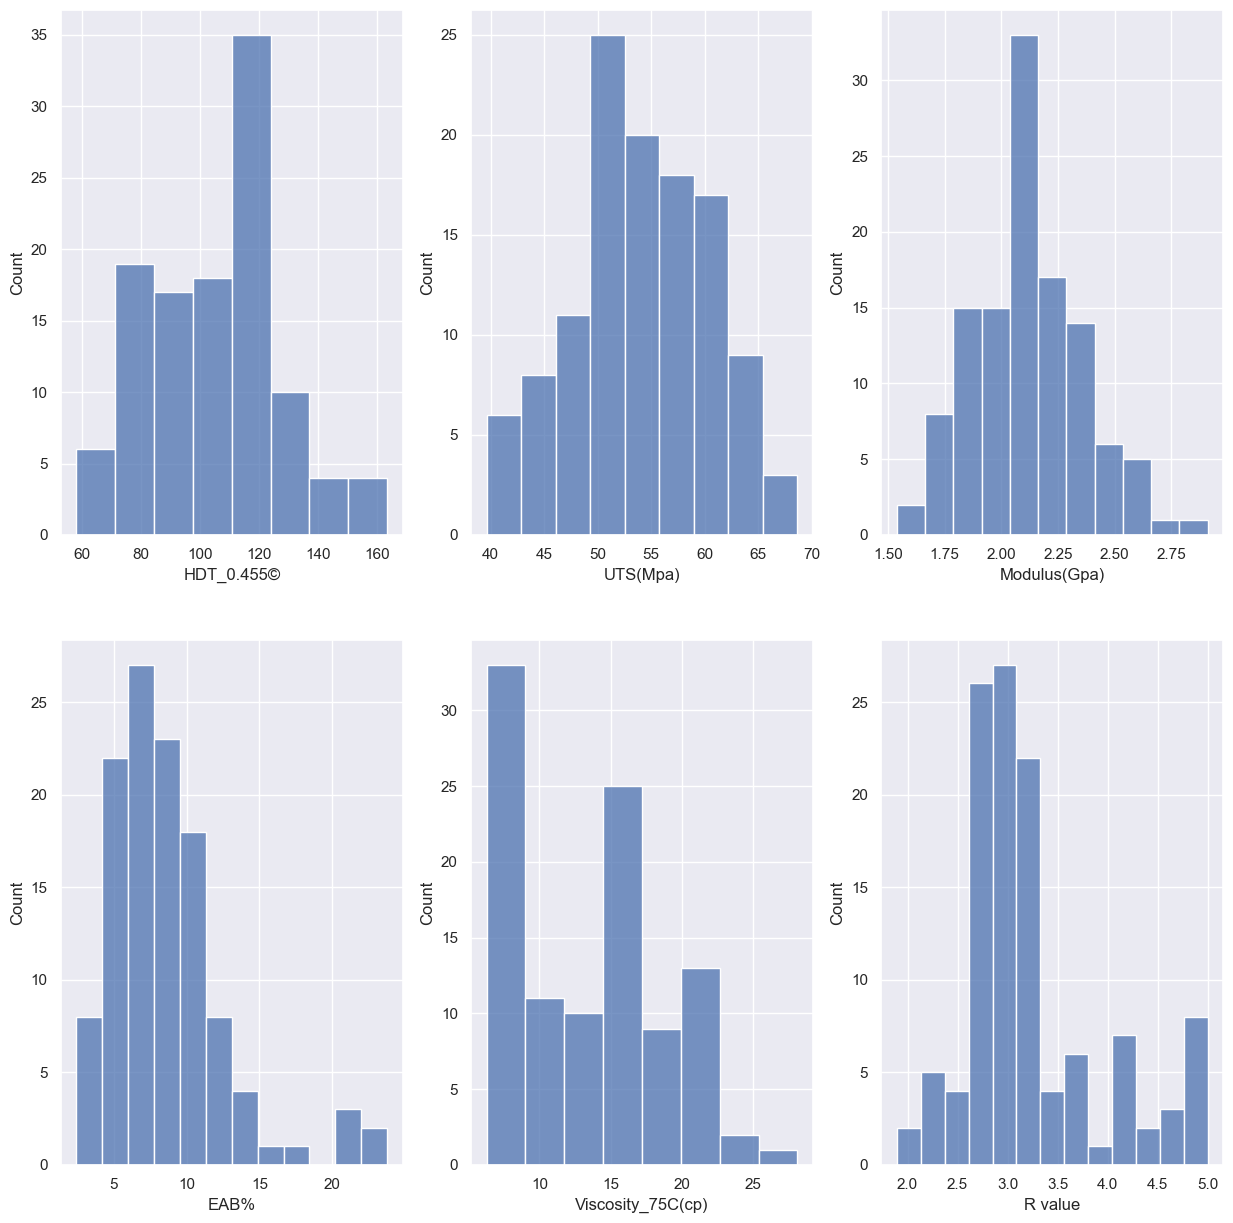

In [603]:
fig,axes = plt.subplots(2,3,figsize=(15,15))
sns.histplot(data2['HDT_0.455©'],ax=axes[0][0])
sns.histplot(data2['UTS(Mpa)'],ax=axes[0][1])
sns.histplot(data2['Modulus(Gpa)'],ax=axes[0][2])
sns.histplot(data2['EAB%'],ax=axes[1][0])
sns.histplot(data2['Viscosity_75C(cp)'],ax=axes[1][1])
sns.histplot(data2['R value'],ax=axes[1][2])


## Checking the OLS assumptions para HDT

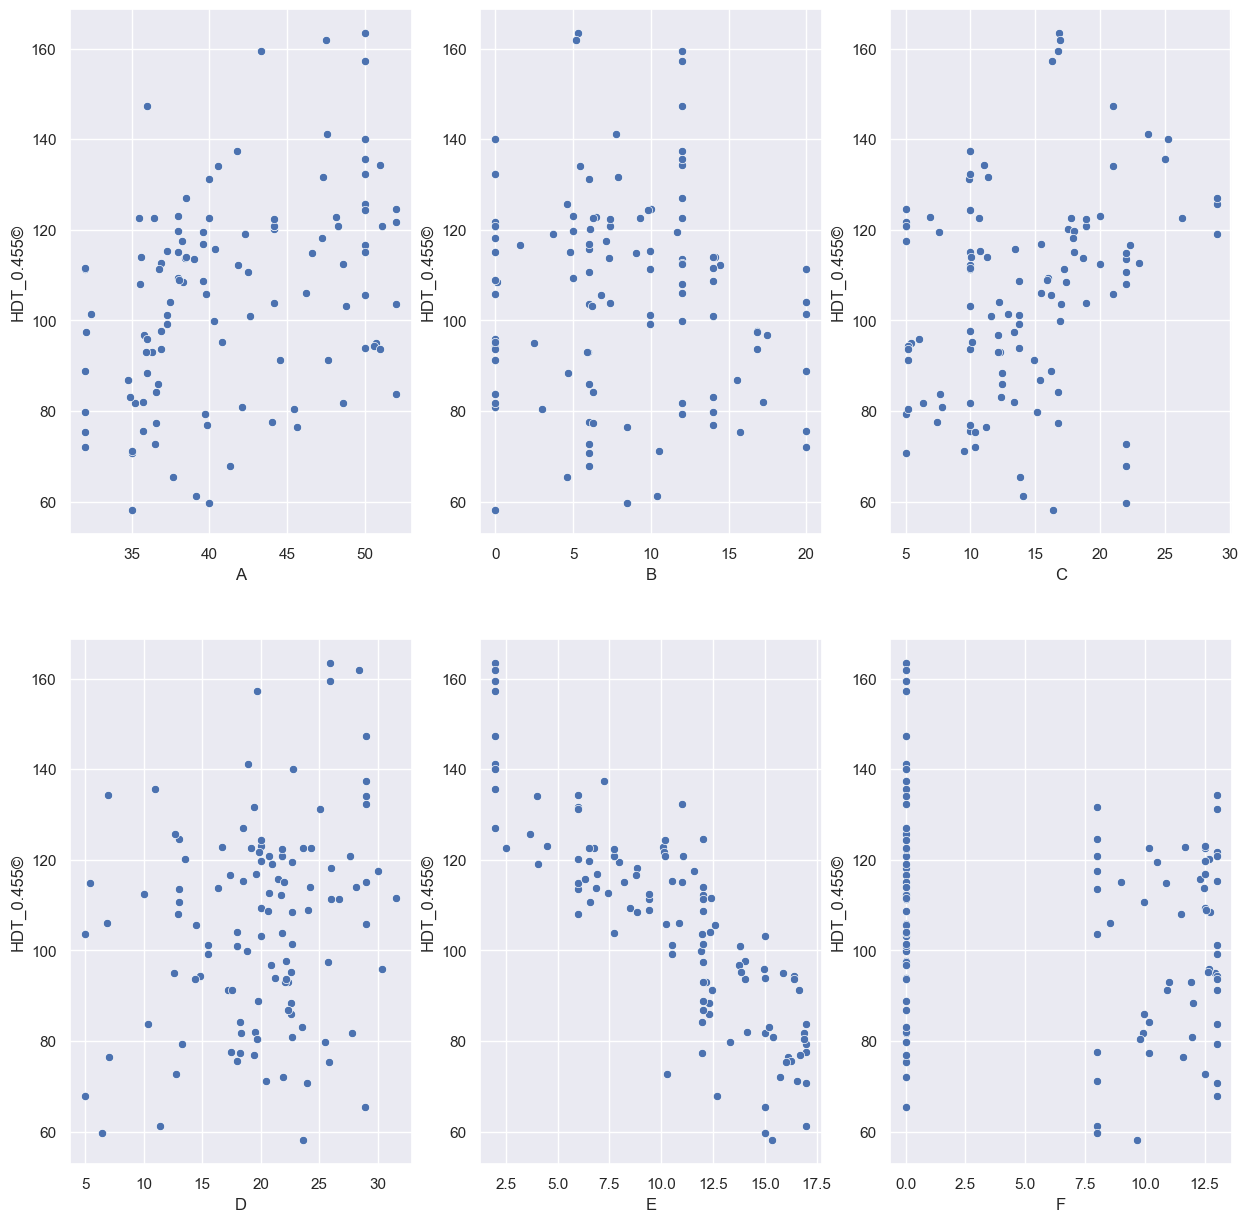

In [604]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
fig,axes = plt.subplots(2,3,figsize=(15,15))
sns.scatterplot(data=data2,x ='A',y='HDT_0.455©',ax=axes[0][0],legend='full')
sns.scatterplot(data=data2,x ='B',y='HDT_0.455©',ax=axes[0][1],legend='full')
sns.scatterplot(data=data2,x ='C',y='HDT_0.455©',ax=axes[0][2],legend='full')
sns.scatterplot(data=data2,x ='D',y='HDT_0.455©',ax=axes[1][0],legend='full')
sns.scatterplot(data=data2,x ='E',y='HDT_0.455©',ax=axes[1][1],legend='full')
sns.scatterplot(data=data2,x ='F',y='HDT_0.455©',ax=axes[1][2],legend='full')


### Relaxing the assumptions

In [658]:
# Let's transform 'HDT' with a log transformation
log_hdt = np.log(data2['HDT_0.455©'])

# Then we add it to our data frame
data2['log_HDT'] = log_hdt
data2.head()

,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value,log_HDT
0,48.15,6.49,6.89,16.71,10.07,11.69,122.90,56.18,2.20,7.63,25.20,4.21,4.81
1,37.29,9.94,13.73,15.51,10.54,13.00,99.20,50.63,1.92,12.77,21.20,2.88,4.60
2,44.18,6.10,17.53,13.51,6.00,12.68,120.20,56.28,2.12,10.54,20.80,3.23,4.79
3,41.33,6.00,22.00,5.00,12.68,13.00,67.80,48.72,2.17,22.42,19.30,1.97,4.22
4,47.28,7.91,11.35,19.46,6.00,8.00,131.70,63.89,2.04,9.47,15.60,4.60,4.88


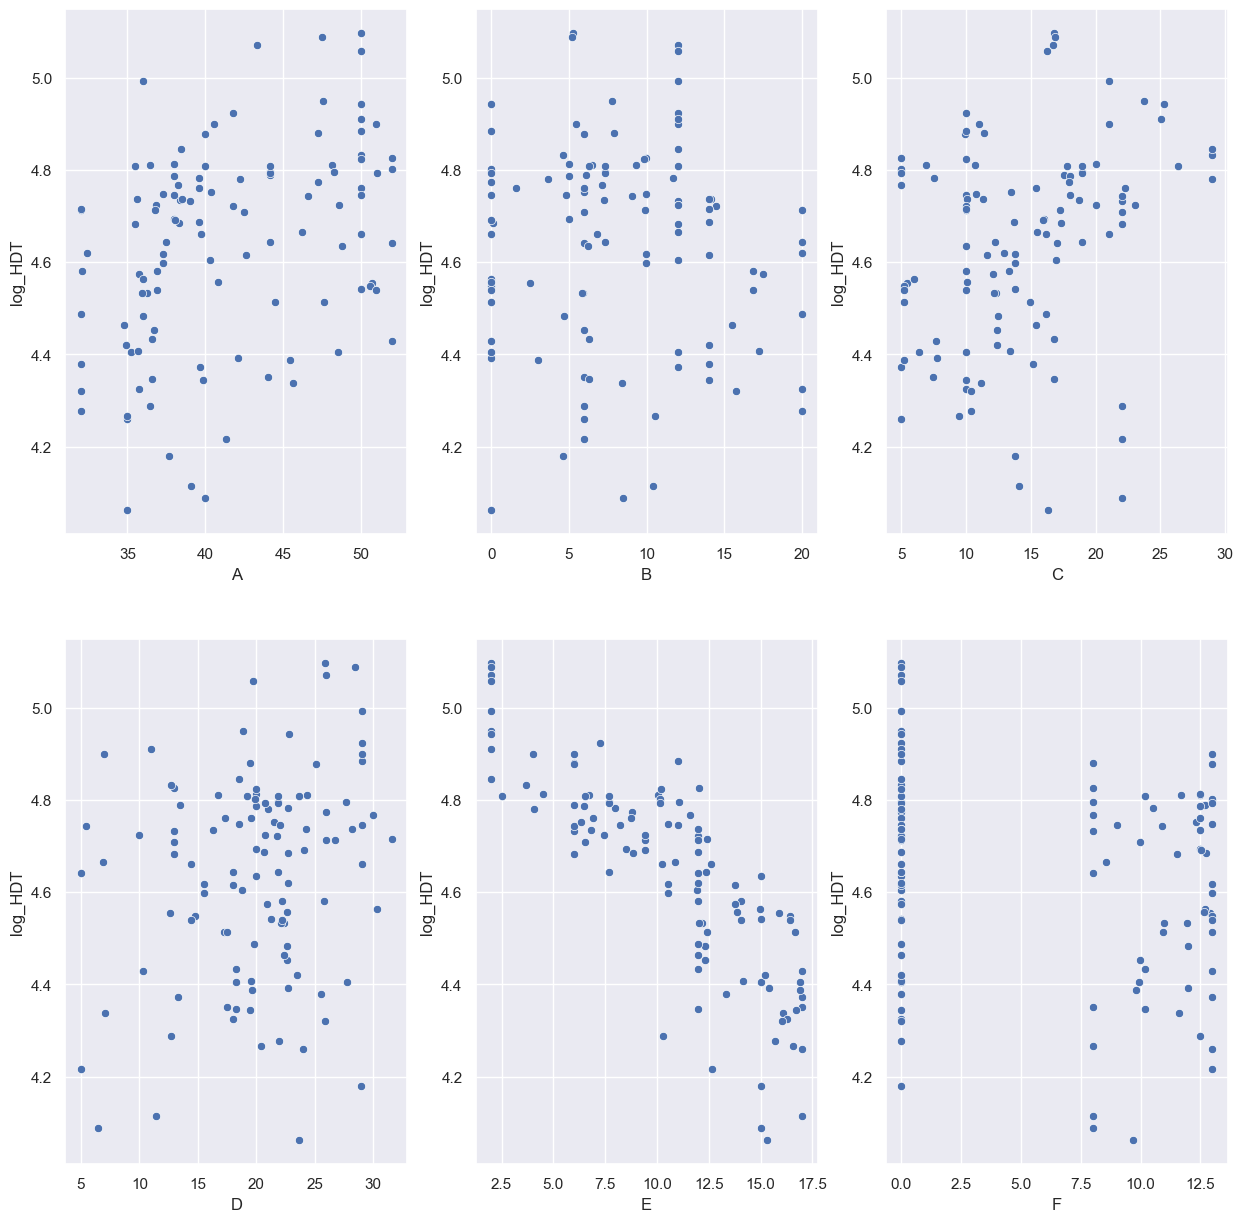

In [647]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
fig,axes = plt.subplots(2,3,figsize=(15,15))
sns.scatterplot(data=data2,x ='A',y='log_HDT',ax=axes[0][0],legend='full')
sns.scatterplot(data=data2,x ='B',y='log_HDT',ax=axes[0][1],legend='full')
sns.scatterplot(data=data2,x ='C',y='log_HDT',ax=axes[0][2],legend='full')
sns.scatterplot(data=data2,x ='D',y='log_HDT',ax=axes[1][0],legend='full')
sns.scatterplot(data=data2,x ='E',y='log_HDT',ax=axes[1][1],legend='full')
sns.scatterplot(data=data2,x ='F',y='log_HDT',ax=axes[1][2],legend='full')


plt.show()

<Axes: xlabel='F', ylabel='log_HDT'>

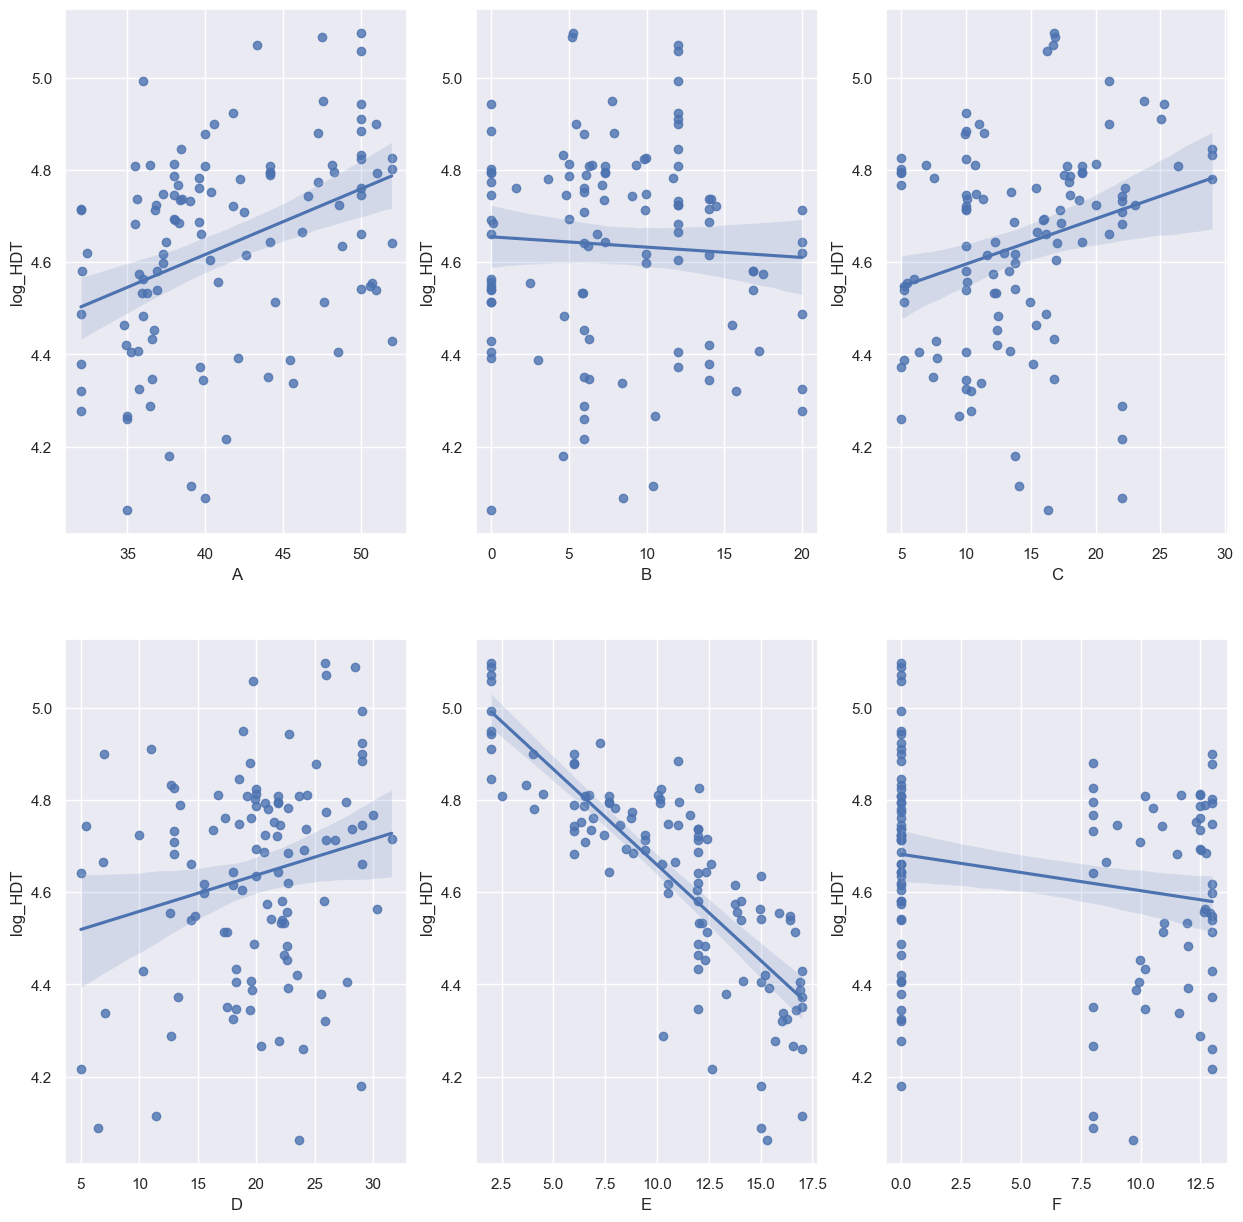

In [648]:


fig,axes = plt.subplots(2,3,figsize=(15,15))
sns.regplot(x =data2['A'],y=data2['log_HDT'],ax=axes[0][0])
sns.regplot(x =data2['B'],y=data2['log_HDT'],ax=axes[0][1])
sns.regplot(x =data2['C'],y=data2['log_HDT'],ax=axes[0][2])
sns.regplot(x =data2['D'],y=data2['log_HDT'],ax=axes[1][0])
sns.regplot(x =data2['E'],y=data2['log_HDT'],ax=axes[1][1])
sns.regplot(x =data2['F'],y=data2['log_HDT'],ax=axes[1][2])
# sns.scatterplot(data=data2,x ='B',y='log_HDT',ax=axes[0][1],legend='full')
# sns.scatterplot(data=data2,x ='C',y='log_HDT',ax=axes[0][2],legend='full')
# sns.scatterplot(data=data2,x ='D',y='log_HDT',ax=axes[1][0],legend='full')
# sns.scatterplot(data=data2,x ='E',y='log_HDT',ax=axes[1][1],legend='full')
# sns.scatterplot(data=data2,x ='F',y='log_HDT',ax=axes[1][2],legend='full')




In [649]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 119
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A                  113 non-null    float64
 1   B                  113 non-null    float64
 2   C                  113 non-null    float64
 3   D                  113 non-null    float64
 4   E                  113 non-null    float64
 5   F                  113 non-null    float64
 6   HDT_0.455©         113 non-null    float64
 7   UTS(Mpa)           113 non-null    float64
 8   Modulus(Gpa)       113 non-null    float64
 9   EAB%               113 non-null    float64
 10  Viscosity_75C(cp)  100 non-null    float64
 11  R value            113 non-null    float64
 12  log_HDT            113 non-null    float64
dtypes: float64(13)
memory usage: 12.4 KB


In [650]:
data2.isnull().sum()

A                     0
B                     0
C                     0
D                     0
E                     0
F                     0
HDT_0.455©            0
UTS(Mpa)              0
Modulus(Gpa)          0
EAB%                  0
Viscosity_75C(cp)    13
R value               0
log_HDT               0
dtype: int64

In [651]:
data2 = data2.dropna(axis=0, subset=['HDT_0.455©'])

In [652]:
data2.isnull().sum()

A                     0
B                     0
C                     0
D                     0
E                     0
F                     0
HDT_0.455©            0
UTS(Mpa)              0
Modulus(Gpa)          0
EAB%                  0
Viscosity_75C(cp)    13
R value               0
log_HDT               0
dtype: int64

### Multicollinearity

In [654]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data2[['A','B','C','D','E','F']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif



,VIF,Features
0,22.27,A
1,3.62,B
2,8.28,C
3,9.12,D
4,8.80,E
5,2.61,F


In [661]:
data_hdt_no_colli = data2.drop(['A'],axis=1)
hdt = data_hdt_no_colli['log_HDT']

In [662]:
variables = data_hdt_no_colli[['B','C','D','E','F']]
vif2 = pd.DataFrame()
vif2["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif2["Features"] = variables.columns
vif2

,VIF,Features
0,3.59,B
1,4.67,C
2,7.47,D
3,6.57,E
4,2.36,F


## Create the multiple linear regression for HDT to fit in the empty values

### Declare the dependent and independent variables

In [411]:
x = data_hdt_no_colli[['B','C','D','E','F']]
y = data_hdt_no_colli['log_HDT']

In [190]:
x1= data2[['A','B','C','D','E','F']]
y1 = data2['log_HDT']

## Standardization

In [663]:
scaler = StandardScaler()
x = variables
y = hdt

In [665]:

scaler.fit(x)
x_scaled = scaler.transform(x)


In [666]:
scaler1 = StandardScaler()

In [667]:
scaler1.fit(x1)

StandardScaler()

In [668]:
x_scaled = scaler.transform(x)
x_scaled

array([[-2.88880825e-01, -1.22654152e+00, -5.48216836e-01,
        -1.09835162e-01,  1.03266759e+00],
       [ 3.17569651e-01, -7.19043457e-02, -7.49289006e-01,
        -1.54082943e-03,  1.26027205e+00],
       [-3.57934606e-01,  5.69469667e-01, -1.08237069e+00,
        -1.03789115e+00,  1.20420987e+00],
       [-3.75068384e-01,  1.32429692e+00, -2.50356353e+00,
         4.85573235e-01,  1.26027205e+00],
       [-3.93400811e-02, -4.73364077e-01, -8.91726826e-02,
        -1.03789115e+00,  3.91348393e-01],
       [ 6.80844132e-01,  1.32429692e+00, -1.16782831e+00,
        -1.03789115e+00,  3.91348393e-01],
       [ 6.28479936e-01, -1.11782938e+00,  4.51110465e-01,
        -5.87932891e-01,  8.29475029e-01],
       [-3.27893409e-01,  4.41999104e-01, -2.95316858e-01,
         3.28620388e-01,  7.72340209e-01],
       [ 6.80844132e-01,  2.19074440e-01, -2.18860528e+00,
         7.61637010e-02,  4.88728411e-01],
       [-3.75068384e-01, -1.54597725e+00,  6.68807623e-01,
         1.47268686e+00

In [415]:
x1_scaled = scaler1.transform(x1)
x1_scaled

array([[ 1.13027276e+00, -2.88880825e-01, -1.22654152e+00,
        -5.48216836e-01, -1.09835162e-01,  1.03266759e+00],
       [-6.94948977e-01,  3.17569651e-01, -7.19043457e-02,
        -7.49289006e-01, -1.54082943e-03,  1.26027205e+00],
       [ 4.63880551e-01, -3.57934606e-01,  5.69469667e-01,
        -1.08237069e+00, -1.03789115e+00,  1.20420987e+00],
       [-1.64378864e-02, -3.75068384e-01,  1.32429692e+00,
        -2.50356353e+00,  4.85573235e-01,  1.26027205e+00],
       [ 9.83841596e-01, -3.93400811e-02, -4.73364077e-01,
        -8.91726826e-02, -1.03789115e+00,  3.91348393e-01],
       [-4.07031114e-01,  6.80844132e-01,  1.32429692e+00,
        -1.16782831e+00, -1.03789115e+00,  3.91348393e-01],
       [-3.10769698e-01,  6.28479936e-01, -1.11782938e+00,
         4.51110465e-01, -5.87932891e-01,  8.29475029e-01],
       [-8.18237496e-01, -3.27893409e-01,  4.41999104e-01,
        -2.95316858e-01,  3.28620388e-01,  7.72340209e-01],
       [ 8.05588781e-01,  6.80844132e-01,  2.190

### Train test split

In [619]:
from sklearn.model_selection import train_test_split

In [669]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3, random_state=42)

In [331]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1_scaled,y1,test_size=0.4, random_state=42)

## Create Regression

In [670]:
reg = LinearRegression()

In [333]:
reg1 = LinearRegression()

In [671]:
reg.fit(x_train,y_train)

LinearRegression()

In [334]:
reg1.fit(x_train1,y_train1)

LinearRegression()

In [672]:
yhat = reg.predict(x_train)

In [335]:
yhat1 = reg1.predict(x_train1)

<function matplotlib.pyplot.show(close=None, block=None)>

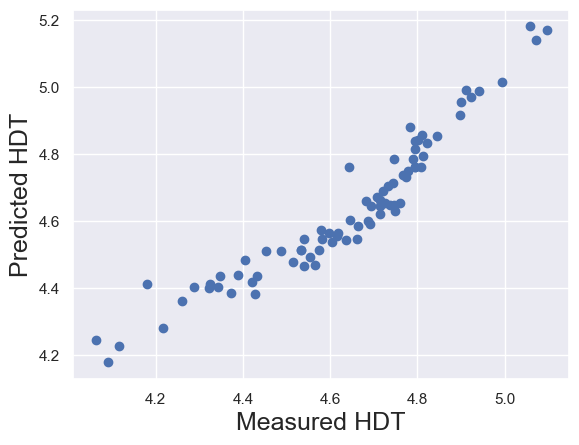

In [673]:
plt.scatter(y_train,yhat)
plt.xlabel('Measured HDT', size=18)
plt.ylabel('Predicted HDT', size=18)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

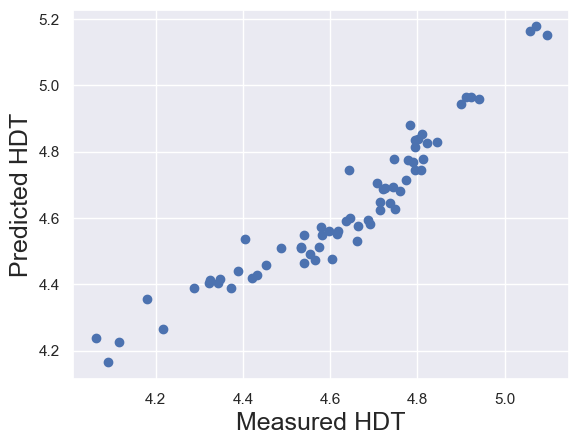

In [336]:
plt.scatter(y_train1,yhat1)
plt.xlabel('Measured HDT', size=18)
plt.ylabel('Predicted HDT', size=18)
plt.show

C:\Users\apmle\AppData\Local\Temp\ipykernel_31540\3638381213.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - yhat)


Text(0.5, 1.0, 'Residuals PDF')

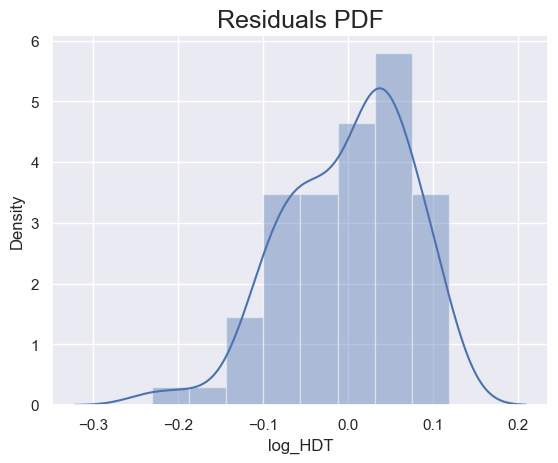

In [674]:
sns.distplot(y_train - yhat)
plt.title('Residuals PDF', size=18)

C:\Users\apmle\AppData\Local\Temp\ipykernel_31540\964145803.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train1 - yhat1)


Text(0.5, 1.0, 'Residuals PDF')

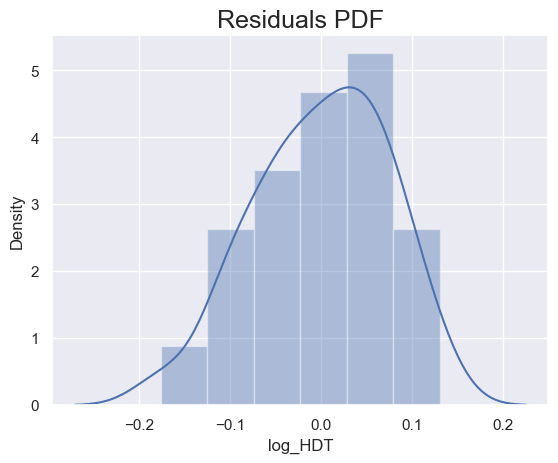

In [675]:
sns.distplot(y_train1 - yhat1)
plt.title('Residuals PDF', size=18)

In [676]:
r2= reg.score(x_train,y_train)
r2

0.8971588854937969

In [677]:
reg.coef_

array([-0.02569014, -0.15445791, -0.02733258, -0.27793345, -0.07460654])

In [679]:
reg.intercept_

4.634436250603127

In [339]:
r2_1= reg1.score(x_train1,y_train1)
r2_1

0.900071109222838

In [340]:
reg1.coef_

array([30.54392277, 29.13527754, 30.23375941, 30.70815065, 22.20878627,
       29.4551143 ])

In [380]:
reg1.intercept_

4.630030436624061

### Formula for Adjusted R^2

### $R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [680]:
x.shape
n = x.shape[0]
p = x.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8923532259374323

In [343]:
x1.shape
n1 = x1.shape[0]
p1 = x1.shape[1]

adjusted_r2_1 = 1-(1-r2_1)*(n1-1)/(n1-p1-1)
adjusted_r2_1

0.8944147569146967

The plot using all the independent variables is better distributted and has higher R2 and higher adjusted R2

## The plot using all the independent variables is better distributted and has higher R2 and higher adjusted R2

### Testing

In [681]:
y_hat_test = reg.predict(x_test)

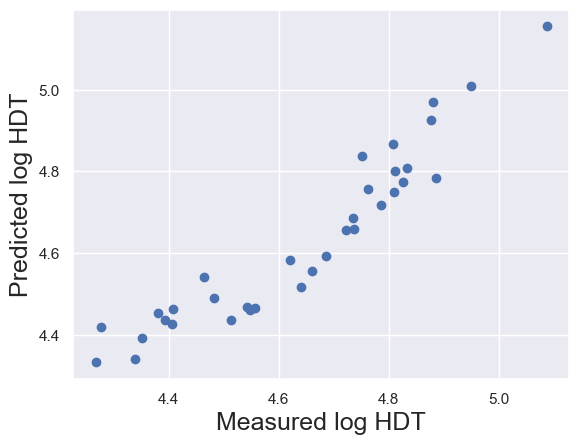

In [682]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Measured log HDT', size=18)
plt.ylabel('Predicted log HDT', size=18)
plt.show()

## Evaluate the Residuals

In [683]:
df_performance = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_performance.head()

,Prediction
0,105.54
1,144.07
2,111.89
3,173.24
4,118.47


In [684]:
df_performance['Measured HDT'] = np.exp(y_test)
df_performance

,Prediction,Measured HDT
0,105.54,122.90
1,144.07,NaN
2,111.89,NaN
3,173.24,NaN
4,118.47,131.70
5,122.47,NaN
6,95.34,NaN
7,105.37,NaN
8,119.62,NaN
9,80.79,NaN


In [685]:
y_test

85    4.74
4     4.88
43    4.79
72    5.09
10    4.83
48    4.83
73    4.66
69    4.72
50    4.89
11    4.35
105   4.62
39    4.48
88    4.38
118   4.41
19    4.34
0     4.81
75    4.54
27    4.73
86    4.28
56    4.95
111   4.51
96    4.46
13    4.64
32    4.76
70    4.81
117   4.39
114   4.56
23    4.27
47    4.81
115   4.69
83    4.41
16    4.88
31    4.75
110   4.55
Name: log_HDT, dtype: float64

In [686]:
y_test = y_test.reset_index(drop=True)
y_test

0    4.74
1    4.88
2    4.79
3    5.09
4    4.83
5    4.83
6    4.66
7    4.72
8    4.89
9    4.35
10   4.62
11   4.48
12   4.38
13   4.41
14   4.34
15   4.81
16   4.54
17   4.73
18   4.28
19   4.95
20   4.51
21   4.46
22   4.64
23   4.76
24   4.81
25   4.39
26   4.56
27   4.27
28   4.81
29   4.69
30   4.41
31   4.88
32   4.75
33   4.55
Name: log_HDT, dtype: float64

In [738]:
df_performance['Measured HDT'] = np.exp(y_test)
df_performance.head()

,Prediction,Measured HDT,Residual,Difference%
0,105.54,114.00,8.46,7.43
1,144.07,131.70,-12.37,9.39
2,111.89,119.80,7.91,6.60
3,173.24,161.90,-11.34,7.00
4,118.47,124.60,6.13,4.92


### Examining  minimizing sum oof squared residuals

In [688]:
df_performance['Residual'] = df_performance['Measured HDT'] - df_performance['Prediction']

In [689]:
df_performance['Difference%'] = np.absolute(df_performance['Residual']/df_performance['Measured HDT']*100)

In [737]:
df_performance.head()

,Prediction,Measured HDT,Residual,Difference%
0,105.54,114.00,8.46,7.43
1,144.07,131.70,-12.37,9.39
2,111.89,119.80,7.91,6.60
3,173.24,161.90,-11.34,7.00
4,118.47,124.60,6.13,4.92


In [691]:
df_performance.describe()

,Prediction,Measured HDT,Residual,Difference%
count,34.00,34.00,34.00,34.00
mean,105.15,105.90,0.75,6.26
std,23.36,22.23,7.54,3.27
min,76.13,71.30,-12.37,0.35
25%,86.63,87.30,-5.86,4.52
50%,98.28,107.05,1.01,6.47
75%,119.33,122.58,7.16,8.18
max,173.24,161.90,12.68,15.20


In [692]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)
df_performance.sort_values(by=['Difference%'])

,Prediction,Measured HDT,Residual,Difference%
14,76.87,76.60,-0.27,0.35
23,116.30,116.90,0.60,0.51
11,89.18,88.50,-0.68,0.76
15,121.48,122.90,1.42,1.15
13,83.62,81.90,-1.72,2.10
5,122.47,125.60,3.13,2.49
10,97.81,101.50,3.69,3.64
9,80.79,77.60,-3.19,4.11
25,84.48,80.90,-3.58,4.43
17,108.34,113.80,5.46,4.80


## Fill null values on main dataframe with regression ##

In [736]:
data2.head()

,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value,log_HDT
0,48.15,6.49,6.89,16.71,10.07,11.69,122.90,56.18,2.20,7.63,25.20,4.21,4.81
1,37.29,9.94,13.73,15.51,10.54,13.00,99.20,50.63,1.92,12.77,21.20,2.88,4.60
2,44.18,6.10,17.53,13.51,6.00,12.68,120.20,56.28,2.12,10.54,20.80,3.23,4.79
3,41.33,6.00,22.00,5.00,12.68,13.00,67.80,48.72,2.17,22.42,19.30,1.97,4.22
4,47.28,7.91,11.35,19.46,6.00,8.00,131.70,63.89,2.04,9.47,15.60,4.60,4.88


In [694]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 119
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A                  113 non-null    float64
 1   B                  113 non-null    float64
 2   C                  113 non-null    float64
 3   D                  113 non-null    float64
 4   E                  113 non-null    float64
 5   F                  113 non-null    float64
 6   HDT_0.455©         113 non-null    float64
 7   UTS(Mpa)           113 non-null    float64
 8   Modulus(Gpa)       113 non-null    float64
 9   EAB%               113 non-null    float64
 10  Viscosity_75C(cp)  100 non-null    float64
 11  R value            113 non-null    float64
 12  log_HDT            113 non-null    float64
dtypes: float64(13)
memory usage: 12.4 KB


In [ ]:
#check versus full data set

In [695]:
HDT_null = data[data['HDT_0.455©'].isnull()]
HDT_null

,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value
37,38.98,8.98,17.04,9.53,14.30,11.18,NaN,43.98,2.16,9.48,17.40,2.16
38,52.00,0.00,22.00,12.00,6.00,8.00,NaN,60.24,2.17,7.43,13.00,2.93
81,42.13,11.10,10.00,23.00,13.77,0.00,NaN,57.34,1.97,8.37,9.05,3.31
82,29.00,12.00,21.68,28.32,9.00,0.00,NaN,56.43,2.23,7.41,7.03,2.80


In [696]:
x_null_hdt= HDT_null[['B','C','D','E','F']]

In [697]:
scaler_hdt = StandardScaler()
scaler_hdt.fit(x_null_hdt)
x_scaled_null_hdt = scaler_hdt.transform(x_null_hdt)

In [698]:
yhat_null = reg.predict(x_scaled_null_hdt)

In [699]:
yhat_null

array([4.29843955, 4.89866896, 4.67544835, 4.66518814])

In [700]:
true_hdt = np.exp(yhat_null)

In [702]:
true_hdt

array([ 73.58487849, 134.11115344, 107.28065567, 106.1855614 ])

In [703]:
HDT_null['HDT_0.455©'] = true_hdt

C:\Users\apmle\AppData\Local\Temp\ipykernel_31540\2348920215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HDT_null['HDT_0.455©'] = true_hdt


In [704]:

# Let's transform 'HDT' with a log transformation
log_hdt = np.log(HDT_null['HDT_0.455©'])

# Then we add it to our data frame
HDT_null['log_HDT']= log_hdt
HDT_null

C:\Users\apmle\AppData\Local\Temp\ipykernel_31540\4281473069.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HDT_null['log_HDT']= log_hdt


,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value,log_HDT
37,38.98,8.98,17.04,9.53,14.30,11.18,73.58,43.98,2.16,9.48,17.40,2.16,4.30
38,52.00,0.00,22.00,12.00,6.00,8.00,134.11,60.24,2.17,7.43,13.00,2.93,4.90
81,42.13,11.10,10.00,23.00,13.77,0.00,107.28,57.34,1.97,8.37,9.05,3.31,4.68
82,29.00,12.00,21.68,28.32,9.00,0.00,106.19,56.43,2.23,7.41,7.03,2.80,4.67


In [705]:
HDT_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 37 to 82
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A                  4 non-null      float64
 1   B                  4 non-null      float64
 2   C                  4 non-null      float64
 3   D                  4 non-null      float64
 4   E                  4 non-null      float64
 5   F                  4 non-null      float64
 6   HDT_0.455©         4 non-null      float64
 7   UTS(Mpa)           4 non-null      float64
 8   Modulus(Gpa)       4 non-null      float64
 9   EAB%               4 non-null      float64
 10  Viscosity_75C(cp)  4 non-null      float64
 11  R value            4 non-null      float64
 12  log_HDT            4 non-null      float64
dtypes: float64(13)
memory usage: 448.0 bytes


In [706]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 119
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A                  113 non-null    float64
 1   B                  113 non-null    float64
 2   C                  113 non-null    float64
 3   D                  113 non-null    float64
 4   E                  113 non-null    float64
 5   F                  113 non-null    float64
 6   HDT_0.455©         113 non-null    float64
 7   UTS(Mpa)           113 non-null    float64
 8   Modulus(Gpa)       113 non-null    float64
 9   EAB%               113 non-null    float64
 10  Viscosity_75C(cp)  100 non-null    float64
 11  R value            113 non-null    float64
 12  log_HDT            113 non-null    float64
dtypes: float64(13)
memory usage: 12.4 KB


In [707]:
data_hdt_corrected = pd.concat([data2, HDT_null])

In [708]:
data_hdt_corrected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 82
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A                  117 non-null    float64
 1   B                  117 non-null    float64
 2   C                  117 non-null    float64
 3   D                  117 non-null    float64
 4   E                  117 non-null    float64
 5   F                  117 non-null    float64
 6   HDT_0.455©         117 non-null    float64
 7   UTS(Mpa)           117 non-null    float64
 8   Modulus(Gpa)       117 non-null    float64
 9   EAB%               117 non-null    float64
 10  Viscosity_75C(cp)  104 non-null    float64
 11  R value            117 non-null    float64
 12  log_HDT            117 non-null    float64
dtypes: float64(13)
memory usage: 12.8 KB


In [735]:
data_hdt_corrected.head()

,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value,log_HDT
0,48.15,6.49,6.89,16.71,10.07,11.69,122.90,56.18,2.20,7.63,25.20,4.21,4.81
1,37.29,9.94,13.73,15.51,10.54,13.00,99.20,50.63,1.92,12.77,21.20,2.88,4.60
2,44.18,6.10,17.53,13.51,6.00,12.68,120.20,56.28,2.12,10.54,20.80,3.23,4.79
3,41.33,6.00,22.00,5.00,12.68,13.00,67.80,48.72,2.17,22.42,19.30,1.97,4.22
4,47.28,7.91,11.35,19.46,6.00,8.00,131.70,63.89,2.04,9.47,15.60,4.60,4.88


In [734]:
data_hdt_corrected.reset_index().head()

,index,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value,log_HDT
0,0,48.15,6.49,6.89,16.71,10.07,11.69,122.90,56.18,2.20,7.63,25.20,4.21,4.81
1,1,37.29,9.94,13.73,15.51,10.54,13.00,99.20,50.63,1.92,12.77,21.20,2.88,4.60
2,2,44.18,6.10,17.53,13.51,6.00,12.68,120.20,56.28,2.12,10.54,20.80,3.23,4.79
3,3,41.33,6.00,22.00,5.00,12.68,13.00,67.80,48.72,2.17,22.42,19.30,1.97,4.22
4,4,47.28,7.91,11.35,19.46,6.00,8.00,131.70,63.89,2.04,9.47,15.60,4.60,4.88


In [711]:
data_hdt_corrected.isnull().sum()

A                     0
B                     0
C                     0
D                     0
E                     0
F                     0
HDT_0.455©            0
UTS(Mpa)              0
Modulus(Gpa)          0
EAB%                  0
Viscosity_75C(cp)    13
R value               0
log_HDT               0
dtype: int64

## Cleaning Viscosity data ##

In [713]:
data3=data_hdt_corrected.dropna(axis=0, subset=['Viscosity_75C(cp)'])

In [715]:
data3.head()

,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value,log_HDT
0,48.15,6.49,6.89,16.71,10.07,11.69,122.90,56.18,2.20,7.63,25.20,4.21,4.81
1,37.29,9.94,13.73,15.51,10.54,13.00,99.20,50.63,1.92,12.77,21.20,2.88,4.60
2,44.18,6.10,17.53,13.51,6.00,12.68,120.20,56.28,2.12,10.54,20.80,3.23,4.79
3,41.33,6.00,22.00,5.00,12.68,13.00,67.80,48.72,2.17,22.42,19.30,1.97,4.22
4,47.28,7.91,11.35,19.46,6.00,8.00,131.70,63.89,2.04,9.47,15.60,4.60,4.88


In [716]:
data3.isnull().sum()

A                    0
B                    0
C                    0
D                    0
E                    0
F                    0
HDT_0.455©           0
UTS(Mpa)             0
Modulus(Gpa)         0
EAB%                 0
Viscosity_75C(cp)    0
R value              0
log_HDT              0
dtype: int64

## Checking OLS assumptions

# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)


<Axes: xlabel='F', ylabel='Viscosity_75C(cp)'>

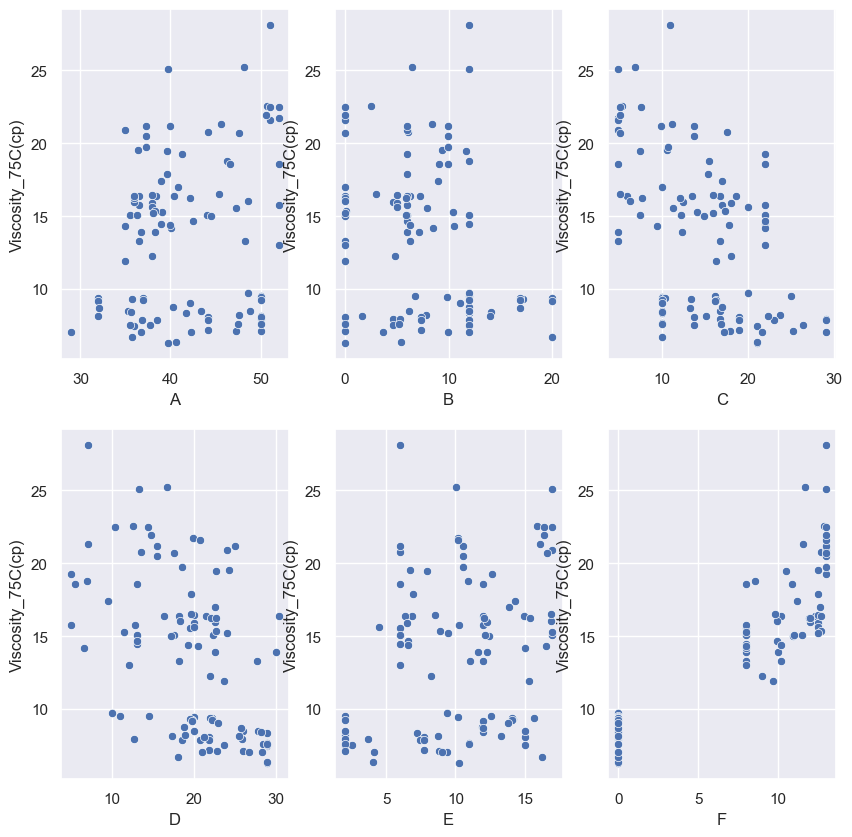

In [718]:
fig,axes = plt.subplots(2,3,figsize=(10,10))
sns.scatterplot(data=data3,x ='A',y='Viscosity_75C(cp)',ax=axes[0][0],legend='full')
sns.scatterplot(data=data3,x ='B',y='Viscosity_75C(cp)',ax=axes[0][1],legend='full')
sns.scatterplot(data=data3,x ='C',y='Viscosity_75C(cp)',ax=axes[0][2],legend='full')
sns.scatterplot(data=data3,x ='D',y='Viscosity_75C(cp)',ax=axes[1][0],legend='full')
sns.scatterplot(data=data3,x ='E',y='Viscosity_75C(cp)',ax=axes[1][1],legend='full')
sns.scatterplot(data=data3,x ='F',y='Viscosity_75C(cp)',ax=axes[1][2],legend='full')

In [719]:
# Let's transform 'HDT' with a log transformation
log_viscosity = np.log(data3['Viscosity_75C(cp)'])

# Then we add it to our data frame
data3['log_viscosity'] = log_viscosity 
data3.head()

C:\Users\apmle\AppData\Local\Temp\ipykernel_31540\335830927.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['log_viscosity'] = log_viscosity


,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value,log_HDT,log_viscosity
0,48.15,6.49,6.89,16.71,10.07,11.69,122.90,56.18,2.20,7.63,25.20,4.21,4.81,3.23
1,37.29,9.94,13.73,15.51,10.54,13.00,99.20,50.63,1.92,12.77,21.20,2.88,4.60,3.05
2,44.18,6.10,17.53,13.51,6.00,12.68,120.20,56.28,2.12,10.54,20.80,3.23,4.79,3.03
3,41.33,6.00,22.00,5.00,12.68,13.00,67.80,48.72,2.17,22.42,19.30,1.97,4.22,2.96
4,47.28,7.91,11.35,19.46,6.00,8.00,131.70,63.89,2.04,9.47,15.60,4.60,4.88,2.75


<Axes: xlabel='F', ylabel='Viscosity_75C(cp)'>

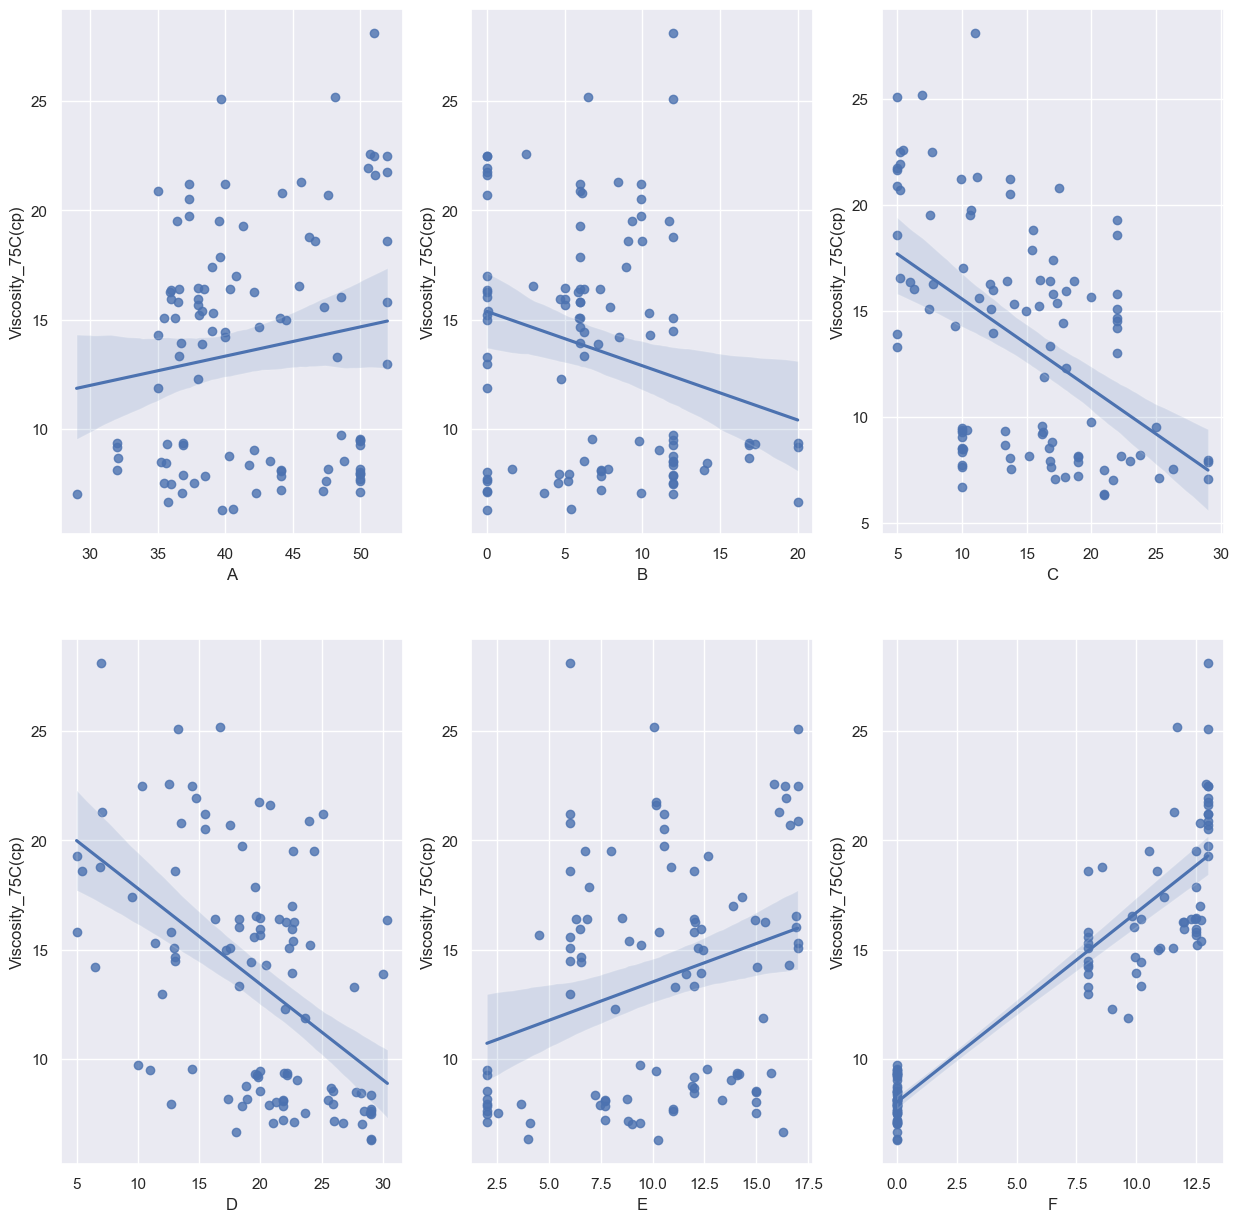

In [766]:

fig,axes = plt.subplots(2,3,figsize=(15,15))
sns.regplot(x =data3['A'],y=data3['Viscosity_75C(cp)'],ax=axes[0][0])
sns.regplot(x =data3['B'],y=data3['Viscosity_75C(cp)'],ax=axes[0][1])
sns.regplot(x =data3['C'],y=data3['Viscosity_75C(cp)'],ax=axes[0][2])
sns.regplot(x =data3['D'],y=data3['Viscosity_75C(cp)'],ax=axes[1][0])
sns.regplot(x =data3['E'],y=data3['Viscosity_75C(cp)'],ax=axes[1][1])
sns.regplot(x =data3['F'],y=data3['Viscosity_75C(cp)'],ax=axes[1][2])
# sns.scatterplot(data=data2,x ='B',y='log_HDT',ax=axes[0][1],legend='full')
# sns.scatterplot(data=data2,x ='C',y='log_HDT',ax=axes[0][2],legend='full')
# sns.scatterplot(data=data2,x ='D',y='log_HDT',ax=axes[1][0],legend='full')
# sns.scatterplot(data=data2,x ='E',y='log_HDT',ax=axes[1][1],legend='full')
# sns.scatterplot(data=data2,x ='F',y='log_HDT',ax=axes[1][2],legend='full')

<Axes: xlabel='F', ylabel='log_viscosity'>

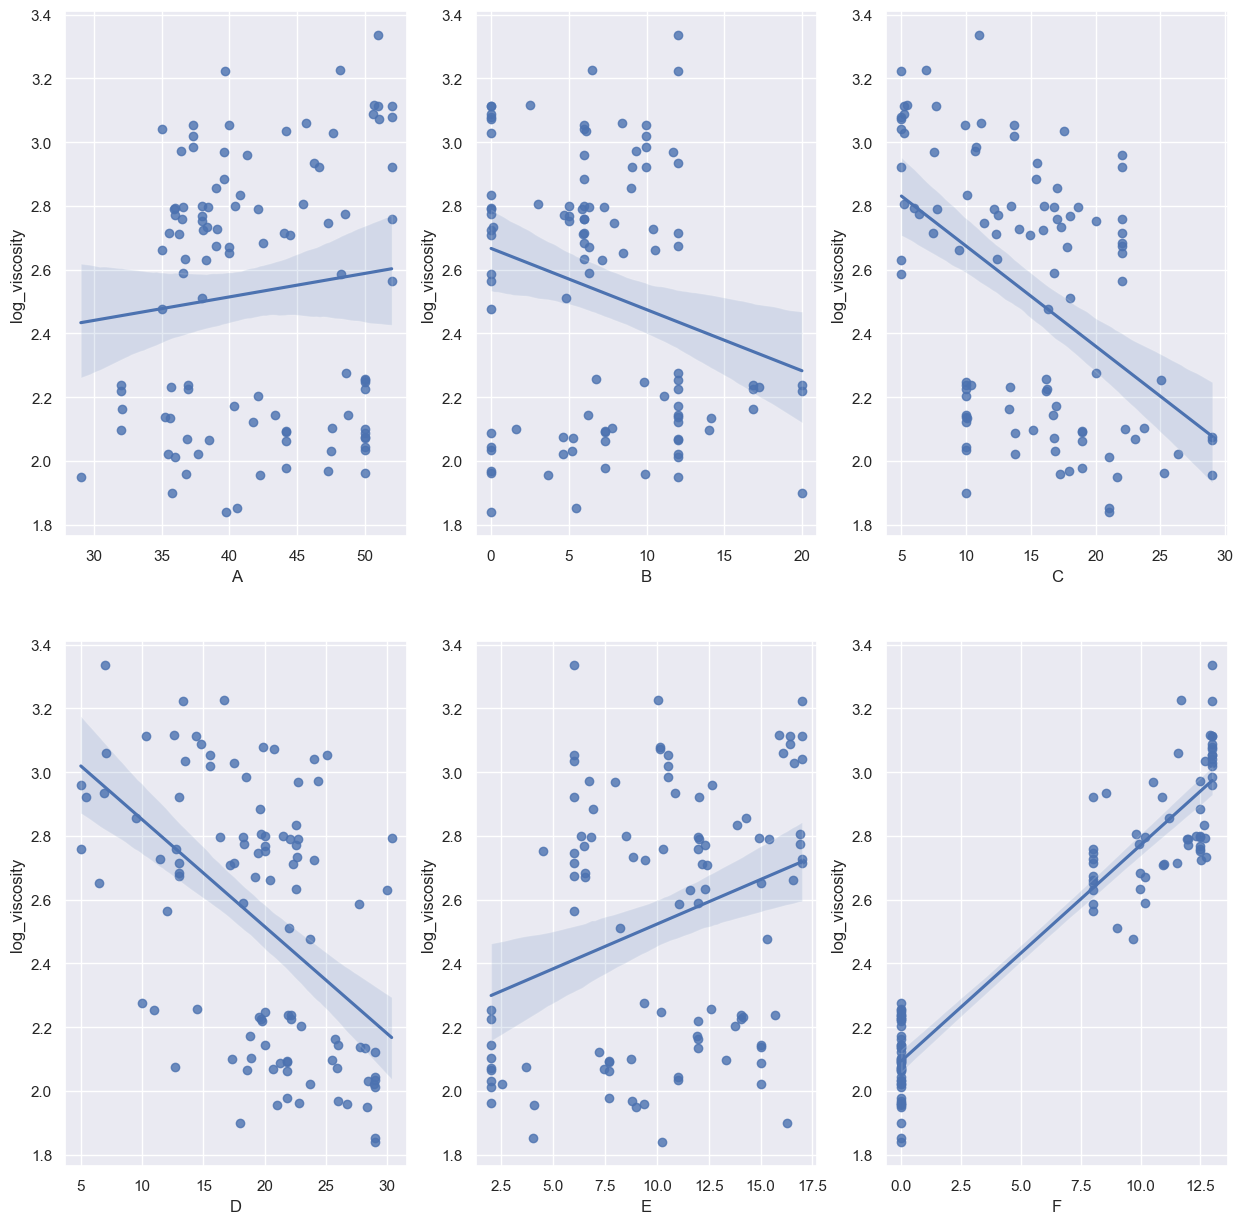

In [768]:
fig,axes = plt.subplots(2,3,figsize=(15,15))
sns.regplot(x =data3['A'],y=data3['log_viscosity'],ax=axes[0][0])
sns.regplot(x =data3['B'],y=data3['log_viscosity'],ax=axes[0][1])
sns.regplot(x =data3['C'],y=data3['log_viscosity'],ax=axes[0][2])
sns.regplot(x =data3['D'],y=data3['log_viscosity'],ax=axes[1][0])
sns.regplot(x =data3['E'],y=data3['log_viscosity'],ax=axes[1][1])
sns.regplot(x =data3['F'],y=data3['log_viscosity'],ax=axes[1][2])
# sns.scatterplot(data=data2,x ='B',y='log_HDT',ax=axes[0][1],legend='full')
# sns.scatterplot(data=data2,x ='C',y='log_HDT',ax=axes[0][2],legend='full')
# sns.scatterplot(data=data2,x ='D',y='log_HDT',ax=axes[1][0],legend='full')
# sns.scatterplot(data=data2,x ='E',y='log_HDT',ax=axes[1][1],legend='full')
# sns.scatterplot(data=data2,x ='F',y='log_HDT',ax=axes[1][2],legend='full')

In [722]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data3[['A','B','C','D','E','F']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,20.84,A
1,3.13,B
2,7.97,C
3,8.20,D
4,7.98,E
5,2.80,F


In [725]:
data_visc_no_colli = data3.drop(['A'],axis=1)


KeyError: 'log_visc'

In [727]:
visc = data_visc_no_colli['log_viscosity']

In [728]:
visc

0     3.23
1     3.05
2     3.03
3     2.96
4     2.75
5     2.67
6     2.97
7     2.80
8     2.93
9     3.04
10    2.92
11    2.71
13    2.76
14    3.22
15    3.34
16    3.05
17    2.63
18    3.02
19    3.06
20    2.73
21    2.65
22    2.92
23    2.66
24    2.97
25    2.59
26    2.63
27    2.80
28    2.76
29    2.71
30    2.69
31    2.80
32    2.88
33    2.48
34    2.71
35    2.59
36    3.11
39    2.77
40    2.71
41    2.79
42    2.80
43    2.77
44    2.75
45    2.51
46    2.98
47    2.67
48    2.08
49    2.06
50    2.04
51    2.14
52    2.12
53    1.97
54    2.10
55    1.98
56    2.10
57    1.84
58    2.09
59    2.07
60    2.06
61    2.10
62    2.14
63    2.17
64    2.07
65    2.01
66    2.25
67    1.96
68    1.85
69    2.28
70    2.02
71    2.02
72    2.03
73    2.26
74    1.96
75    2.09
76    1.96
77    2.03
78    2.25
79    2.23
80    2.14
83    2.23
84    2.24
85    2.14
86    2.24
87    2.22
88    2.10
89    1.90
90    2.23
91    2.16
107   3.08
108   3.07
109   3.12
110   3.09

In [730]:
variables2 = data3[['B','C','D','E','F']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.12,B
1,4.66,C
2,6.66,D
3,5.99,E
4,2.56,F


In [732]:
scaler = StandardScaler()
x3 = variables2
y3 = visc

scaler.fit(x3)
x3_scaled = scaler.transform(x3)

In [733]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x3_scaled,y3,test_size=0.3, random_state=42)

In [739]:
reg3 =LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

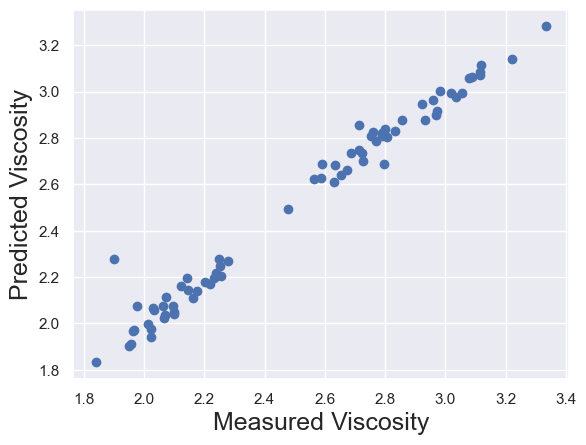

In [741]:
reg3.fit(x3_train,y3_train)
yhat3 = reg3.predict(x3_train)
plt.scatter(y3_train,yhat3)
plt.xlabel('Measured Viscosity', size=18)
plt.ylabel('Predicted Viscosity', size=18)
plt.show

C:\Users\apmle\AppData\Local\Temp\ipykernel_31540\3636786938.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y3_train - yhat3)


Text(0.5, 1.0, 'Residuals PDF')

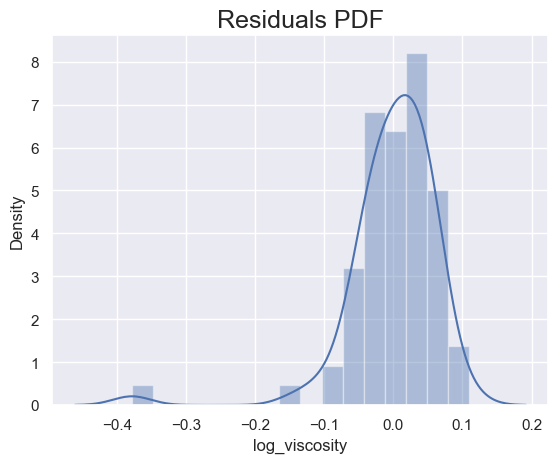

In [742]:
sns.distplot(y3_train - yhat3)
plt.title('Residuals PDF', size=18)

In [743]:
r3= reg3.score(x3_train,y3_train)
r3

0.9757787811946079

In [744]:
reg.coef_

array([-0.02569014, -0.15445791, -0.02733258, -0.27793345, -0.07460654])

In [745]:
reg.intercept_

4.634436250603127

In [747]:
x3.shape
n3 = x.shape[0]
p3 = x.shape[1]
adjusted_r2_3 = 1-(1-r3)*(n3-1)/(n3-p3-1)
adjusted_r2_3

0.9746469485401503

In [748]:
y_hat_test3 = reg3.predict(x3_test)

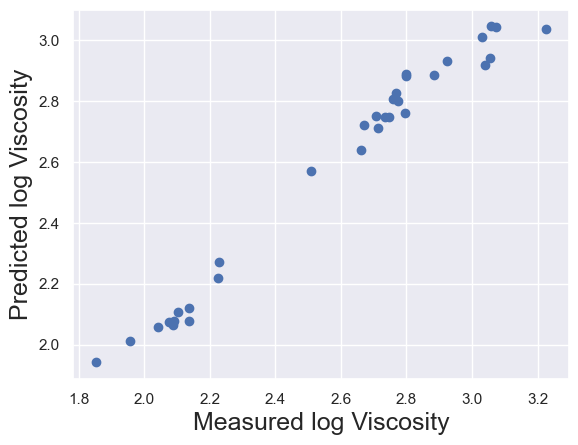

In [749]:
plt.scatter(y3_test,y_hat_test3)
plt.xlabel('Measured log Viscosity', size=18)
plt.ylabel('Predicted log Viscosity', size=18)
plt.show()

In [752]:
df_performance_visc = pd.DataFrame(np.exp(y_hat_test3), columns=['Prediction'])
df_performance_visc.head()

,Prediction
0,17.98
1,6.97
2,7.47
3,8.23
4,7.95


In [755]:
df_performance_visc['Measured Viscosity'] = np.exp(y3_test)
df_performance_visc.head()

,Prediction,Measured Viscosity
0,17.98,25.20
1,6.97,NaN
2,7.47,NaN
3,8.23,NaN
4,7.95,15.60


In [759]:
y3_test

0    2.80
1    1.85
2    1.96
3    2.10
4    2.08
5    2.79
6    3.03
7    2.04
8    2.92
9    3.23
10   3.06
11   2.88
12   3.07
13   2.73
14   2.14
15   2.75
16   2.14
17   2.71
18   2.76
19   2.80
20   2.77
21   2.09
22   2.66
23   2.23
24   2.67
25   2.09
26   3.05
27   2.51
28   2.77
29   3.04
30   2.23
31   2.71
Name: log_viscosity, dtype: float64

In [760]:
y3_test = y3_test.reset_index(drop=True)
y3_test


0    2.80
1    1.85
2    1.96
3    2.10
4    2.08
5    2.79
6    3.03
7    2.04
8    2.92
9    3.23
10   3.06
11   2.88
12   3.07
13   2.73
14   2.14
15   2.75
16   2.14
17   2.71
18   2.76
19   2.80
20   2.77
21   2.09
22   2.66
23   2.23
24   2.67
25   2.09
26   3.05
27   2.51
28   2.77
29   3.04
30   2.23
31   2.71
Name: log_viscosity, dtype: float64

In [761]:
df_performance_visc['Measured Viscosity'] = np.exp(y3_test)
df_performance_visc

,Prediction,Measured Viscosity
0,17.98,16.42
1,6.97,6.37
2,7.47,7.09
3,8.23,8.20
4,7.95,7.97
5,15.83,16.36
6,20.30,20.69
7,7.81,7.71
8,18.76,18.60
9,20.83,25.20


In [762]:

df_performance_visc['Residual'] = df_performance_visc['Measured Viscosity'] - df_performance_visc['Prediction']
df_performance_visc['Difference%'] = np.absolute(df_performance_visc['Residual']/df_performance_visc['Measured Viscosity']*100)
df_performance_visc

,Prediction,Measured Viscosity,Residual,Difference%
0,17.98,16.42,-1.56,9.48
1,6.97,6.37,-0.60,9.34
2,7.47,7.09,-0.39,5.47
3,8.23,8.20,-0.03,0.39
4,7.95,7.97,0.02,0.28
5,15.83,16.36,0.53,3.25
6,20.30,20.69,0.39,1.88
7,7.81,7.71,-0.10,1.30
8,18.76,18.60,-0.16,0.85
9,20.83,25.20,4.37,17.34


In [763]:

df_performance_visc.describe()

,Prediction,Measured Viscosity,Residual,Difference%
count,32.00,32.00,32.00,32.00
mean,14.14,14.23,0.09,4.21
std,4.81,5.22,1.13,4.06
min,6.97,6.37,-1.56,0.14
25%,8.31,8.48,-0.46,1.36
50%,15.61,15.24,-0.03,2.77
75%,17.94,16.79,0.30,5.74
max,21.00,25.20,4.37,17.34


In [764]:
df_performance_visc.sort_values(by=['Difference%'])

,Prediction,Measured Viscosity,Residual,Difference%
15,15.62,15.60,-0.02,0.14
11,17.93,17.89,-0.04,0.24
4,7.95,7.97,0.02,0.28
3,8.23,8.20,-0.03,0.39
31,15.03,15.10,0.07,0.49
30,9.19,9.26,0.08,0.83
8,18.76,18.60,-0.16,0.85
7,7.81,7.71,-0.10,1.30
13,15.60,15.38,-0.21,1.38
10,21.00,21.30,0.30,1.41


In [765]:
data3.isnull().sum()

A                    0
B                    0
C                    0
D                    0
E                    0
F                    0
HDT_0.455©           0
UTS(Mpa)             0
Modulus(Gpa)         0
EAB%                 0
Viscosity_75C(cp)    0
R value              0
log_HDT              0
log_viscosity        0
dtype: int64

In [769]:
visc_null = data[data['Viscosity_75C(cp)'].isnull()]
visc_null

,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value
92,32.00,15.74,10.38,25.86,16.02,0.00,75.30,48.77,2.14,6.40,NaN,2.88
93,41.81,14.46,10.00,21.73,12.00,0.00,112.30,39.63,1.91,2.42,NaN,3.62
94,32.00,20.00,10.00,26.00,12.00,0.00,111.40,53.82,2.37,8.20,NaN,3.59
95,39.62,14.00,13.72,20.66,12.00,0.00,108.60,60.27,2.10,5.73,NaN,3.11
96,34.77,15.53,15.36,22.34,12.00,0.00,86.90,51.24,2.13,5.45,NaN,2.93
97,38.49,14.00,11.27,24.23,12.00,0.00,114.10,54.96,1.93,6.54,NaN,3.45
98,42.64,14.00,11.58,18.00,13.78,0.00,101.00,58.14,1.96,6.32,NaN,3.06
99,39.86,14.00,10.00,19.44,16.70,0.00,77.00,53.95,2.14,7.91,NaN,2.80
100,37.46,20.00,12.19,18.00,12.35,0.00,104.00,54.21,2.15,5.00,NaN,3.17
101,37.82,15.72,16.46,18.00,12.00,0.00,98.10,NaN,NaN,NaN,NaN,2.80


In [770]:
x_null_visc= visc_null[['B','C','D','E','F']]

In [771]:
scaler_visc = StandardScaler()
scaler_visc.fit(x_null_visc)
x_scaled_null_visc = scaler_visc.transform(x_null_visc)

In [772]:
yhat3_null = reg3.predict(x_scaled_null_visc)

In [773]:
yhat3_null

array([2.3966288 , 2.69236202, 2.61608418, 2.47215488, 2.32554557,
       2.52434128, 2.63025256, 2.57869   , 2.70621796, 2.39004997,
       2.36366495, 2.83513315, 2.54030968, 2.52433923, 2.34944666])

In [774]:
true_visc = np.exp(yhat3_null)


In [775]:
visc_null['Viscosity_75C(cp)'] = true_visc

C:\Users\apmle\AppData\Local\Temp\ipykernel_31540\137450261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visc_null['Viscosity_75C(cp)'] = true_visc


In [776]:
visc_null

,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value
92,32.00,15.74,10.38,25.86,16.02,0.00,75.30,48.77,2.14,6.40,10.99,2.88
93,41.81,14.46,10.00,21.73,12.00,0.00,112.30,39.63,1.91,2.42,14.77,3.62
94,32.00,20.00,10.00,26.00,12.00,0.00,111.40,53.82,2.37,8.20,13.68,3.59
95,39.62,14.00,13.72,20.66,12.00,0.00,108.60,60.27,2.10,5.73,11.85,3.11
96,34.77,15.53,15.36,22.34,12.00,0.00,86.90,51.24,2.13,5.45,10.23,2.93
97,38.49,14.00,11.27,24.23,12.00,0.00,114.10,54.96,1.93,6.54,12.48,3.45
98,42.64,14.00,11.58,18.00,13.78,0.00,101.00,58.14,1.96,6.32,13.88,3.06
99,39.86,14.00,10.00,19.44,16.70,0.00,77.00,53.95,2.14,7.91,13.18,2.80
100,37.46,20.00,12.19,18.00,12.35,0.00,104.00,54.21,2.15,5.00,14.97,3.17
101,37.82,15.72,16.46,18.00,12.00,0.00,98.10,NaN,NaN,NaN,10.91,2.80


In [777]:
log_visc = np.log(visc_null['Viscosity_75C(cp)'])

In [778]:
visc_null['log_viscosity']= log_visc
visc_null

C:\Users\apmle\AppData\Local\Temp\ipykernel_31540\149323807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visc_null['log_viscosity']= log_visc


,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value,log_viscosity
92,32.00,15.74,10.38,25.86,16.02,0.00,75.30,48.77,2.14,6.40,10.99,2.88,2.40
93,41.81,14.46,10.00,21.73,12.00,0.00,112.30,39.63,1.91,2.42,14.77,3.62,2.69
94,32.00,20.00,10.00,26.00,12.00,0.00,111.40,53.82,2.37,8.20,13.68,3.59,2.62
95,39.62,14.00,13.72,20.66,12.00,0.00,108.60,60.27,2.10,5.73,11.85,3.11,2.47
96,34.77,15.53,15.36,22.34,12.00,0.00,86.90,51.24,2.13,5.45,10.23,2.93,2.33
97,38.49,14.00,11.27,24.23,12.00,0.00,114.10,54.96,1.93,6.54,12.48,3.45,2.52
98,42.64,14.00,11.58,18.00,13.78,0.00,101.00,58.14,1.96,6.32,13.88,3.06,2.63
99,39.86,14.00,10.00,19.44,16.70,0.00,77.00,53.95,2.14,7.91,13.18,2.80,2.58
100,37.46,20.00,12.19,18.00,12.35,0.00,104.00,54.21,2.15,5.00,14.97,3.17,2.71
101,37.82,15.72,16.46,18.00,12.00,0.00,98.10,NaN,NaN,NaN,10.91,2.80,2.39


In [779]:
visc_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 92 to 106
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A                  15 non-null     float64
 1   B                  15 non-null     float64
 2   C                  15 non-null     float64
 3   D                  15 non-null     float64
 4   E                  15 non-null     float64
 5   F                  15 non-null     float64
 6   HDT_0.455©         15 non-null     float64
 7   UTS(Mpa)           13 non-null     float64
 8   Modulus(Gpa)       13 non-null     float64
 9   EAB%               13 non-null     float64
 10  Viscosity_75C(cp)  15 non-null     float64
 11  R value            15 non-null     float64
 12  log_viscosity      15 non-null     float64
dtypes: float64(13)
memory usage: 1.6 KB


In [789]:
data_visc_corrected = pd.concat([data3, visc_null])

In [790]:
data_visc_corrected.head()

,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value,log_HDT,log_viscosity
0,48.15,6.49,6.89,16.71,10.07,11.69,122.90,56.18,2.20,7.63,25.20,4.21,4.81,3.23
1,37.29,9.94,13.73,15.51,10.54,13.00,99.20,50.63,1.92,12.77,21.20,2.88,4.60,3.05
2,44.18,6.10,17.53,13.51,6.00,12.68,120.20,56.28,2.12,10.54,20.80,3.23,4.79,3.03
3,41.33,6.00,22.00,5.00,12.68,13.00,67.80,48.72,2.17,22.42,19.30,1.97,4.22,2.96
4,47.28,7.91,11.35,19.46,6.00,8.00,131.70,63.89,2.04,9.47,15.60,4.60,4.88,2.75


In [791]:
data_visc_corrected['log_HDT']=np.log(data_visc_corrected['HDT_0.455©'])
data_visc_corrected['log_viscosity']=np.log(data_visc_corrected['Viscosity_75C(cp)'])

In [792]:
data_visc_corrected.head()

,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value,log_HDT,log_viscosity
0,48.15,6.49,6.89,16.71,10.07,11.69,122.90,56.18,2.20,7.63,25.20,4.21,4.81,3.23
1,37.29,9.94,13.73,15.51,10.54,13.00,99.20,50.63,1.92,12.77,21.20,2.88,4.60,3.05
2,44.18,6.10,17.53,13.51,6.00,12.68,120.20,56.28,2.12,10.54,20.80,3.23,4.79,3.03
3,41.33,6.00,22.00,5.00,12.68,13.00,67.80,48.72,2.17,22.42,19.30,1.97,4.22,2.96
4,47.28,7.91,11.35,19.46,6.00,8.00,131.70,63.89,2.04,9.47,15.60,4.60,4.88,2.75


In [793]:
data_visc_corrected.isnull().sum()

A                    0
B                    0
C                    0
D                    0
E                    0
F                    0
HDT_0.455©           0
UTS(Mpa)             2
Modulus(Gpa)         2
EAB%                 2
Viscosity_75C(cp)    0
R value              0
log_HDT              0
log_viscosity        0
dtype: int64

In [794]:
data_visc_corrected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 106
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A                  119 non-null    float64
 1   B                  119 non-null    float64
 2   C                  119 non-null    float64
 3   D                  119 non-null    float64
 4   E                  119 non-null    float64
 5   F                  119 non-null    float64
 6   HDT_0.455©         119 non-null    float64
 7   UTS(Mpa)           117 non-null    float64
 8   Modulus(Gpa)       117 non-null    float64
 9   EAB%               117 non-null    float64
 10  Viscosity_75C(cp)  119 non-null    float64
 11  R value            119 non-null    float64
 12  log_HDT            119 non-null    float64
 13  log_viscosity      119 non-null    float64
dtypes: float64(14)
memory usage: 13.9 KB


In [795]:
data_final = data_visc_corrected[data_visc_corrected['UTS(Mpa)'].notna()]

In [796]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 106
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A                  117 non-null    float64
 1   B                  117 non-null    float64
 2   C                  117 non-null    float64
 3   D                  117 non-null    float64
 4   E                  117 non-null    float64
 5   F                  117 non-null    float64
 6   HDT_0.455©         117 non-null    float64
 7   UTS(Mpa)           117 non-null    float64
 8   Modulus(Gpa)       117 non-null    float64
 9   EAB%               117 non-null    float64
 10  Viscosity_75C(cp)  117 non-null    float64
 11  R value            117 non-null    float64
 12  log_HDT            117 non-null    float64
 13  log_viscosity      117 non-null    float64
dtypes: float64(14)
memory usage: 13.7 KB


In [797]:
data_final.isnull().sum()

A                    0
B                    0
C                    0
D                    0
E                    0
F                    0
HDT_0.455©           0
UTS(Mpa)             0
Modulus(Gpa)         0
EAB%                 0
Viscosity_75C(cp)    0
R value              0
log_HDT              0
log_viscosity        0
dtype: int64

In [799]:
data_final.reset_index()

,index,A,B,C,D,E,F,HDT_0.455©,UTS(Mpa),Modulus(Gpa),EAB%,Viscosity_75C(cp),R value,log_HDT,log_viscosity
0,0,48.15,6.49,6.89,16.71,10.07,11.69,122.90,56.18,2.20,7.63,25.20,4.21,4.81,3.23
1,1,37.29,9.94,13.73,15.51,10.54,13.00,99.20,50.63,1.92,12.77,21.20,2.88,4.60,3.05
2,2,44.18,6.10,17.53,13.51,6.00,12.68,120.20,56.28,2.12,10.54,20.80,3.23,4.79,3.03
3,3,41.33,6.00,22.00,5.00,12.68,13.00,67.80,48.72,2.17,22.42,19.30,1.97,4.22,2.96
4,4,47.28,7.91,11.35,19.46,6.00,8.00,131.70,63.89,2.04,9.47,15.60,4.60,4.88,2.75
5,5,39.00,12.00,22.00,13.00,6.00,8.00,113.60,60.56,2.34,6.67,14.50,2.83,4.73,2.67
6,6,39.57,11.70,7.54,22.70,7.97,10.52,119.50,56.96,1.84,8.47,19.50,4.80,4.78,2.97
7,7,36.55,6.27,16.77,18.23,11.99,10.19,84.20,51.11,2.08,21.13,16.40,2.53,4.43,2.80
8,8,46.22,12.00,15.45,6.89,10.88,8.56,106.10,57.94,2.39,8.24,18.80,2.73,4.66,2.93
9,9,35.00,6.00,5.00,24.00,17.00,13.00,70.80,42.18,1.74,23.78,20.90,2.94,4.26,3.04


In [801]:
data_final.to_csv('treated_data2.csv')